In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
url = "hurtos_pasto.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head(10)

,id_hurtos,fecha,departamento,municipio,dia,barrio,zona,clase_sitio,arma_empleada,movil_agresor,movil_victima,edad,genero,estado_civil,pais_nacimiento,clase_empleado,escolaridad,codigo_dane,cantidad
0,1,2010-01-01 04:00:00,NARIÑO,PASTO (CT),Viernes,SUMATAMBO,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,41,M,CASADO,COLOMBIA,NO REPORTA,SUPERIOR,52001000,1
1,2,2010-01-03 13:00:00,NARIÑO,PASTO (CT),Domingo,CONDOMINIO MORASURCO,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,41,M,CASADO,COLOMBIA,EMPLEADO PARTICULAR,SUPERIOR,52001000,1
2,3,2010-01-04 17:30:00,NARIÑO,PASTO (CT),Lunes,VILLA LUCIA,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,20,F,SOLTERO,NaN,ESTUDIANTE,SECUNDARIA,52001000,1
3,4,2010-01-04 01:57:00,NARIÑO,PASTO (CT),Lunes,RIO BLANCO,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,18,F,CASADO,NaN,AMA DE CASA,SECUNDARIA,52001000,1
4,5,2010-01-06 23:50:00,NARIÑO,PASTO (CT),Miércoles,CORAZON DE JESUS,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,23,M,CASADO,COLOMBIA,EMPLEADO POLICIAL,SECUNDARIA,52001000,1
5,6,2010-01-06 23:50:00,NARIÑO,PASTO (CT),Miércoles,CORAZON DE JESUS,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,33,M,CASADO,COLOMBIA,EMPLEADO POLICIAL,SECUNDARIA,52001000,1
6,7,2010-01-07 16:00:00,NARIÑO,PASTO (CT),Jueves,MARIDIAZ,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,CONDUCTOR MOTOCICLETA,CONDUCTOR MOTOCICLETA,33,M,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,SECUNDARIA,52001000,1
7,8,2010-01-07 11:30:00,NARIÑO,PASTO (CT),Jueves,CATAMBUCO CENTRO,RURAL,VIAS PUBLICAS,ARMA DE FUEGO,CONDUCTOR VEHICULO,CONDUCTOR VEHICULO,37,M,CASADO,COLOMBIA,EMPLEADO PARTICULAR,SECUNDARIA,52001000,1
8,9,2010-01-07 18:20:00,NARIÑO,PASTO (CT),Jueves,ALTAMIRA,URBANA,PARQUEADERO,CONTUNDENTES,NaN,NaN,32,F,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,SUPERIOR,52001000,1
9,10,2010-01-09 01:00:00,NARIÑO,PASTO (CT),Sábado,LA AURORA,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,26,M,SOLTERO,COLOMBIA,EMPLEADO POLICIAL,SUPERIOR,52001000,1


In [5]:
df.drop(['codigo_dane','cantidad'], axis=1, inplace=True)

In [6]:
df.head()

,id_hurtos,fecha,departamento,municipio,dia,barrio,zona,clase_sitio,arma_empleada,movil_agresor,movil_victima,edad,genero,estado_civil,pais_nacimiento,clase_empleado,escolaridad
0,1,2010-01-01 04:00:00,NARIÑO,PASTO (CT),Viernes,SUMATAMBO,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,41,M,CASADO,COLOMBIA,NO REPORTA,SUPERIOR
1,2,2010-01-03 13:00:00,NARIÑO,PASTO (CT),Domingo,CONDOMINIO MORASURCO,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,41,M,CASADO,COLOMBIA,EMPLEADO PARTICULAR,SUPERIOR
2,3,2010-01-04 17:30:00,NARIÑO,PASTO (CT),Lunes,VILLA LUCIA,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,20,F,SOLTERO,NaN,ESTUDIANTE,SECUNDARIA
3,4,2010-01-04 01:57:00,NARIÑO,PASTO (CT),Lunes,RIO BLANCO,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,18,F,CASADO,NaN,AMA DE CASA,SECUNDARIA
4,5,2010-01-06 23:50:00,NARIÑO,PASTO (CT),Miércoles,CORAZON DE JESUS,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,23,M,CASADO,COLOMBIA,EMPLEADO POLICIAL,SECUNDARIA


In [7]:
df.dtypes

id_hurtos           int64
fecha              object
departamento       object
municipio          object
dia                object
barrio             object
zona               object
clase_sitio        object
arma_empleada      object
movil_agresor      object
movil_victima      object
edad                int64
genero             object
estado_civil       object
pais_nacimiento    object
clase_empleado     object
escolaridad        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30699 entries, 0 to 30698
Data columns (total 17 columns):
id_hurtos          30699 non-null int64
fecha              30699 non-null object
departamento       30699 non-null object
municipio          30699 non-null object
dia                30699 non-null object
barrio             30655 non-null object
zona               30699 non-null object
clase_sitio        30690 non-null object
arma_empleada      30684 non-null object
movil_agresor      30257 non-null object
movil_victima      30350 non-null object
edad               30699 non-null int64
genero             30699 non-null object
estado_civil       30316 non-null object
pais_nacimiento    29656 non-null object
clase_empleado     30699 non-null object
escolaridad        30207 non-null object
dtypes: int64(2), object(15)
memory usage: 4.0+ MB


In [9]:
total_valores_perdidos = df.isnull().sum()
total_valores_perdidos

id_hurtos             0
fecha                 0
departamento          0
municipio             0
dia                   0
barrio               44
zona                  0
clase_sitio           9
arma_empleada        15
movil_agresor       442
movil_victima       349
edad                  0
genero                0
estado_civil        383
pais_nacimiento    1043
clase_empleado        0
escolaridad         492
dtype: int64

In [10]:
total_celdas = np.product(df.shape)
total_celdas

521883

In [11]:
total_perdidos = total_valores_perdidos.sum()
total_perdidos

2777

In [12]:
total_perdidos/total_celdas*100

0.5321116035586521

In [13]:
pd.value_counts(df['barrio'])

CENTRO                              4278
POTRERILLO                           687
PALERMO                              615
AV. LAS AMERICAS                     572
FATIMA                               564
                                    ... 
OJO DE AGUA                            1
SAGRADA FAMILIA                        1
VEREDA LOS ANGELES SANTA BARBARA       1
CONJUNTO SAN DIEGO                     1
VDA ALTO CASANARE CATAMBUCO            1
Name: barrio, Length: 486, dtype: int64

In [14]:
df["barrio"].replace(np.nan, 'CENTRO', inplace=True)

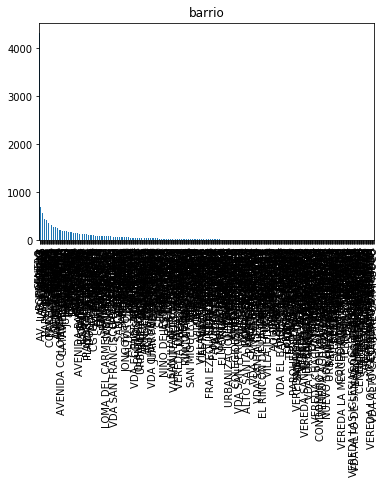

In [15]:
plot = df['barrio'].value_counts().plot(kind='bar', title='barrio')

In [16]:
pd.value_counts(df['clase_sitio'])

VIAS PUBLICAS                         19894
FRENTE A RESIDENCIAS  VIA PUBLICA      1669
CASAS DE HABITACION                    1301
CALLEJÓN                                381
INTERIOR VEHICULO SERVICIO PUBLICO      355
                                      ...  
LAVANULLAUTOS                             1
ESCALERAS FIJAS                           1
PISCINA                                   1
FRENTE A BANCO NULL VIA PUBLICA           1
FRENTE A EDIFICIO NULL VIA PUBLICA        1
Name: clase_sitio, Length: 192, dtype: int64

In [17]:
df["clase_sitio"].replace(np.nan, 'VIAS PUBLICAS', inplace=True)

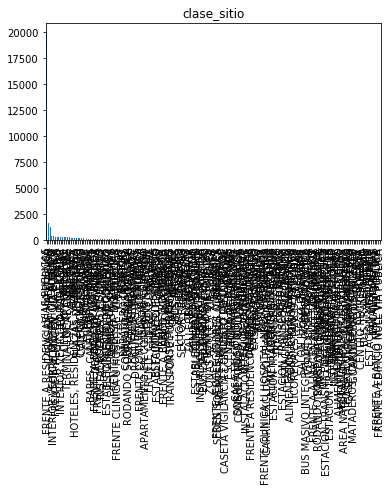

In [39]:
plot = df['clase_sitio'].value_counts().plot(kind='bar', title='clase_sitio')

In [18]:
pd.value_counts(df['arma_empleada'])

SIN EMPLEO DE ARMAS            15525
ARMA BLANCA / CORTOPUNZANTE     7615
CONTUNDENTES                    4112
ARMA DE FUEGO                   2151
NO REPORTADO                    1043
ESCOPOLAMINA                     214
CORTANTES                         16
PERRO                              4
LLAVE MAESTRA                      4
Name: arma_empleada, dtype: int64

In [19]:
df["arma_empleada"].replace(np.nan, 'SIN EMPLEO DE ARMAS', inplace=True)

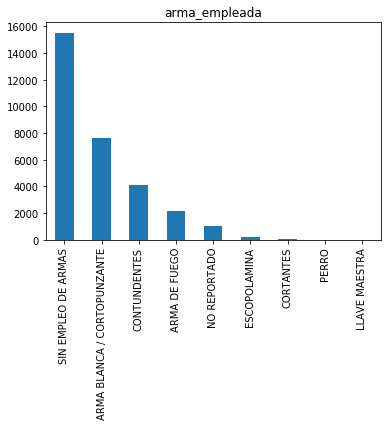

In [32]:
plot = df['arma_empleada'].value_counts().plot(kind='bar', title='arma_empleada')

In [20]:
pd.value_counts(df['movil_agresor'])

A PIE                    20781
CONDUCTOR MOTOCICLETA     6003
PASAJERO MOTOCICLETA      2315
CONDUCTOR TAXI             343
CONDUCTOR VEHICULO         313
PASAJERO BUS               257
BICICLETA                   95
PASAJERO TAXI               91
PASAJERO VEHICULO           47
CONDUCTOR BUS                9
PASAJERO METRO               3
Name: movil_agresor, dtype: int64

In [21]:
df["movil_agresor"].replace(np.nan, 'A PIE', inplace=True)

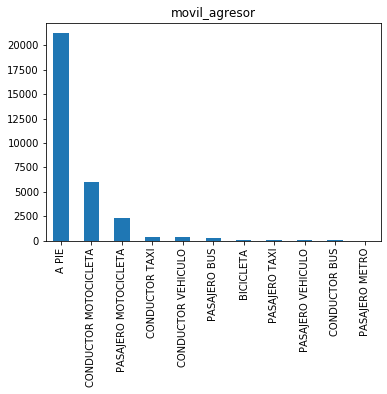

In [33]:
plot = df['movil_agresor'].value_counts().plot(kind='bar', title='movil_agresor')

In [22]:
pd.value_counts(df['movil_victima'])

A PIE                    27038
CONDUCTOR VEHICULO        1176
CONDUCTOR MOTOCICLETA      868
PASAJERO TAXI              264
PASAJERO BUS               244
PASAJERO MOTOCICLETA       216
BICICLETA                  212
CONDUCTOR TAXI             132
PASAJERO VEHICULO          130
CONDUCTOR BUS               69
PASAJERO AERONAVE            1
Name: movil_victima, dtype: int64

In [34]:
df["movil_victima"].replace(np.nan, 'A PIE', inplace=True)

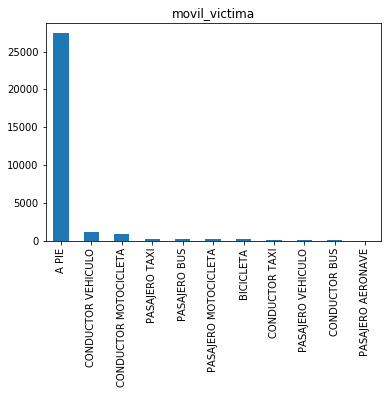

In [35]:
plot = df['movil_victima'].value_counts().plot(kind='bar', title='movil_victima')

In [24]:
pd.value_counts(df['estado_civil'])

SOLTERO        17236
CASADO          6686
UNION LIBRE     4849
DIVORCIADO       765
VIUDO            357
SEPARADO         263
NO REPORTA       160
Name: estado_civil, dtype: int64

In [25]:
df["estado_civil"].replace(np.nan, 'SOLTERO', inplace=True)

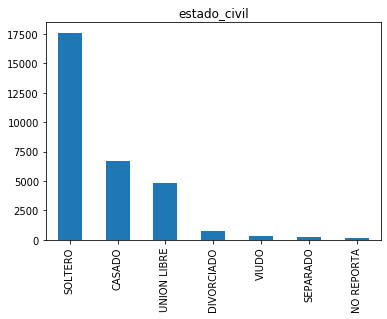

In [36]:
plot = df['estado_civil'].value_counts().plot(kind='bar', title='estado_civil')

In [26]:
pd.value_counts(df['pais_nacimiento'])

COLOMBIA           29410
ECUADOR              128
VENEZUELA             42
FRANCIA                8
ESTADOS UNIDOS         6
CHILE                  6
AUSTRALIA              5
ESPAÑA                 5
HOLANDA                4
CHINA                  4
ALEMANIA               3
CANADA                 3
COREA                  3
JAPON                  3
INGLATERRA             2
CUBA                   2
ARGENTINA              2
HONDURAS               2
SUECIA                 1
PORTUGAL               1
REPUBLICA CHECA        1
CABO VERDE             1
CROACIA                1
ESLOVENIA              1
NORUEGA                1
BRASIL                 1
UCRANIA                1
ISRAEL                 1
DINAMARCA              1
RUSIA                  1
PERU                   1
REINO UNIDO            1
AFGANISTAN             1
ESTONIA                1
PANAMA                 1
BOLIVIA                1
Name: pais_nacimiento, dtype: int64

In [27]:
df["pais_nacimiento"].replace(np.nan, 'COLOMBIA', inplace=True)

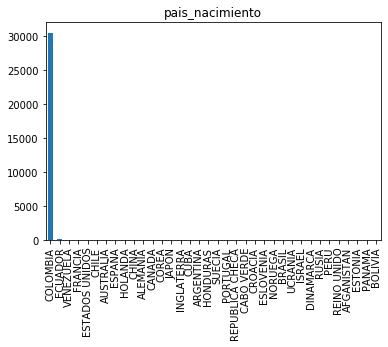

In [37]:
plot = df['pais_nacimiento'].value_counts().plot(kind='bar', title='pais_nacimiento')

In [28]:
pd.value_counts(df['escolaridad'])

SECUNDARIA      13098
SUPERIOR         8356
PRIMARIA         4909
TECNICO          2636
NO REPORTADO      680
TECNOLOGO         505
ANALFABETA         23
Name: escolaridad, dtype: int64

In [29]:
df["escolaridad"].replace(np.nan, 'SECUNDARIA', inplace=True)

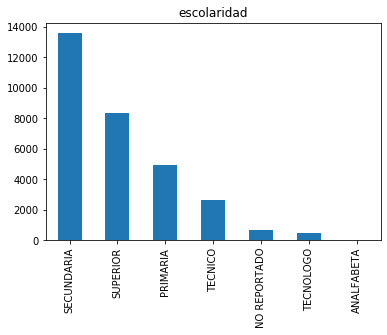

In [38]:
plot = df['escolaridad'].value_counts().plot(kind='bar', title='escolaridad')

In [30]:
total_valores_perdidos = df.isnull().sum()
total_valores_perdidos

id_hurtos          0
fecha              0
departamento       0
municipio          0
dia                0
barrio             0
zona               0
clase_sitio        0
arma_empleada      0
movil_agresor      0
movil_victima      0
edad               0
genero             0
estado_civil       0
pais_nacimiento    0
clase_empleado     0
escolaridad        0
dtype: int64

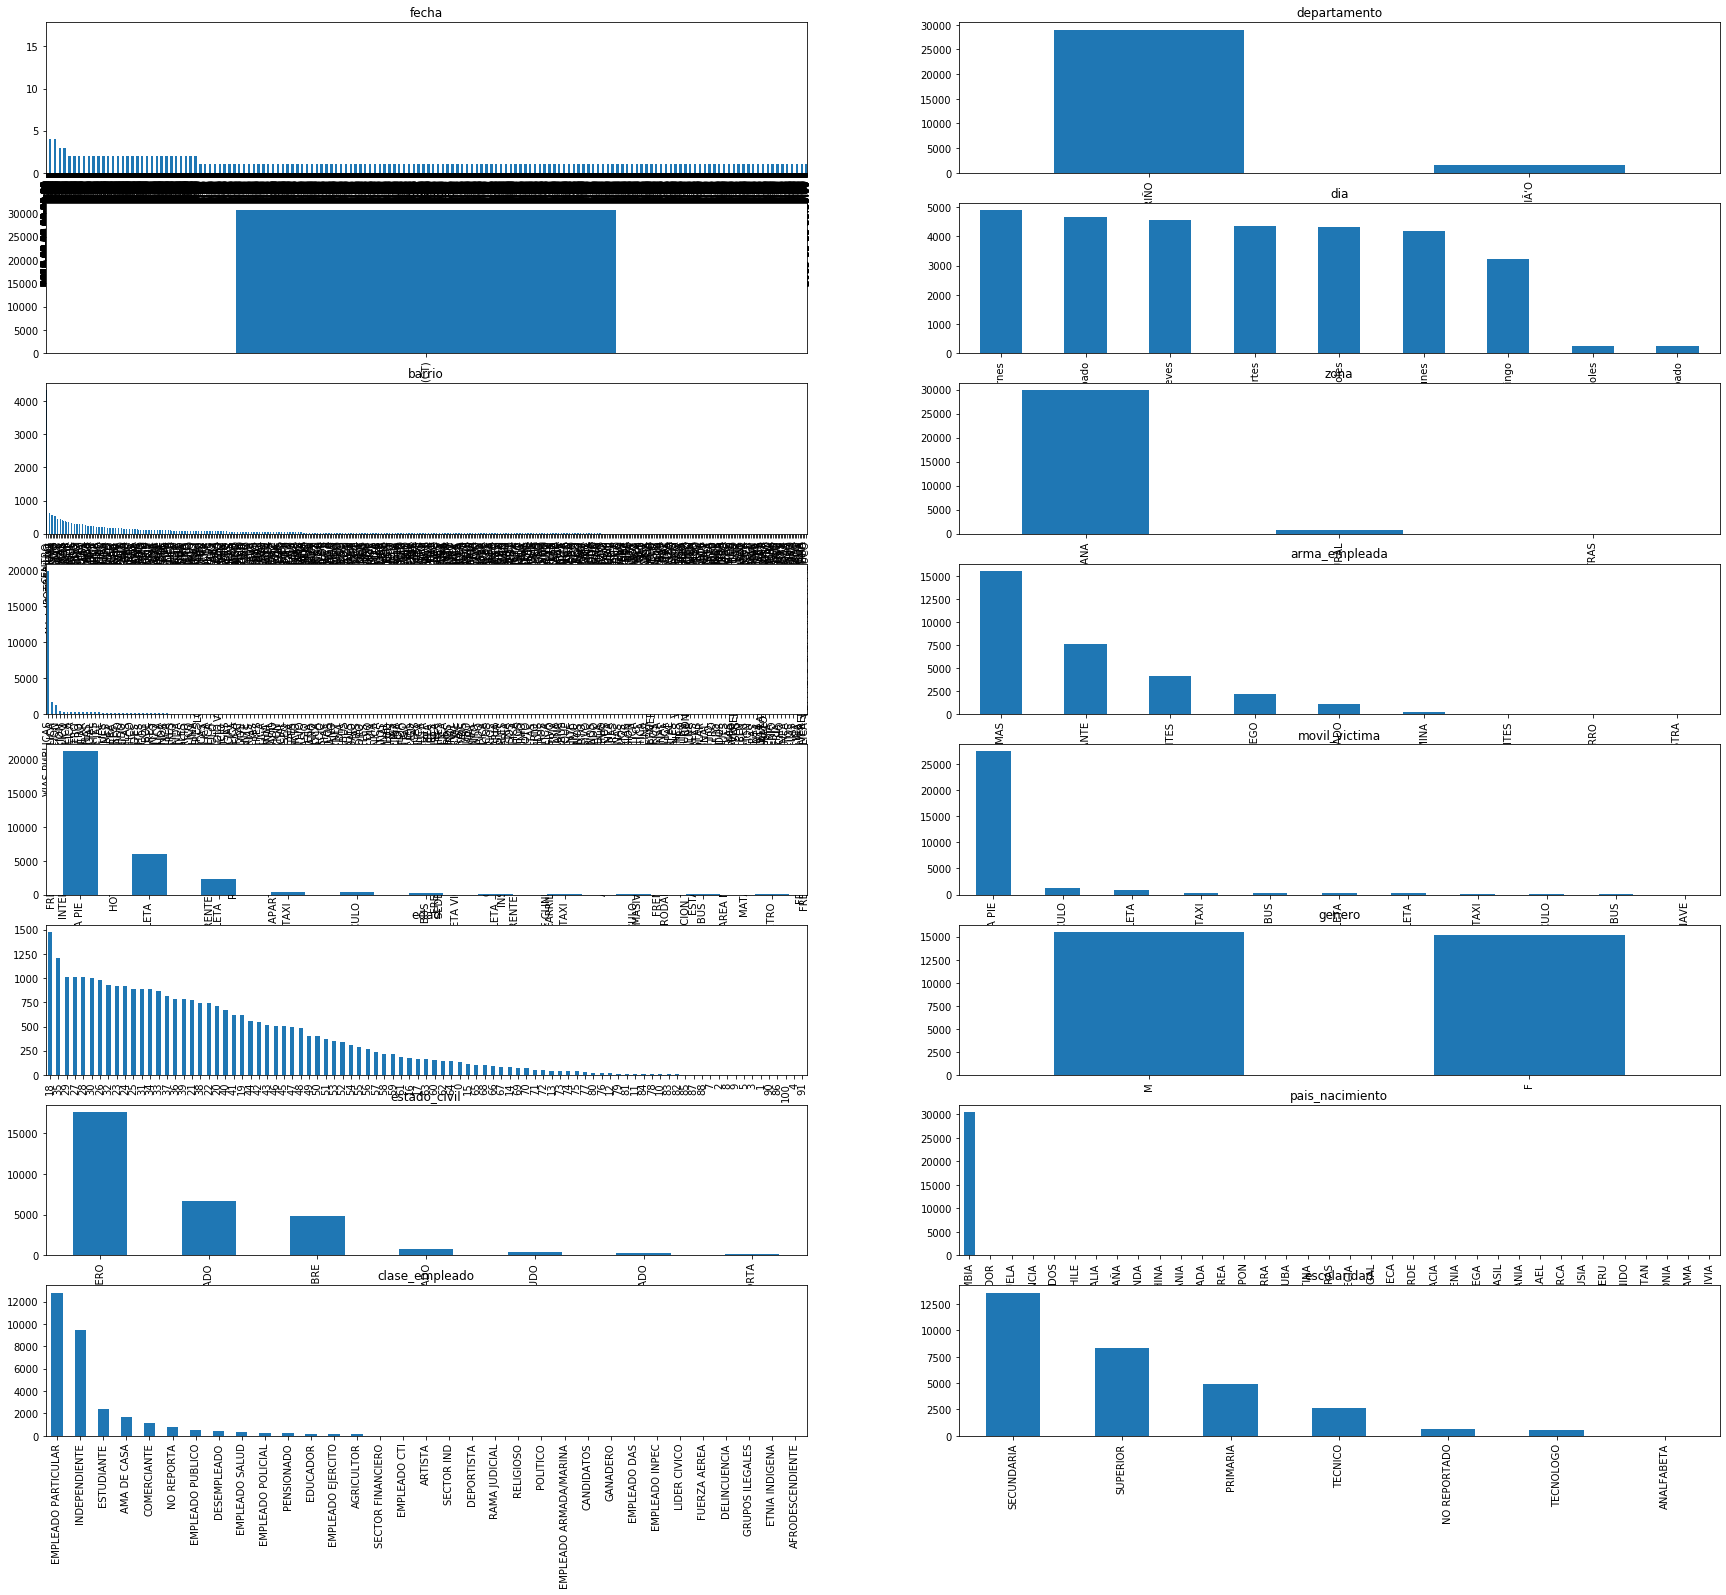

In [41]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(30,26)

plt.subplot(8, 2, 1)
plot = df['fecha'].value_counts().plot(kind='bar', title='fecha')
plt.subplot(8, 2, 2)
plot = df['departamento'].value_counts().plot(kind='bar', title='departamento')
plt.subplot(8, 2, 3)
plot = df['municipio'].value_counts().plot(kind='bar', title='municipio')
plt.subplot(8, 2, 4)
plot = df['dia'].value_counts().plot(kind='bar', title='dia')
plt.subplot(8, 2, 5)
plot = df['barrio'].value_counts().plot(kind='bar', title='barrio')
plt.subplot(8, 2, 6)
plot = df['zona'].value_counts().plot(kind='bar', title='zona')
plt.subplot(8, 2, 7)
plot = df['clase_sitio'].value_counts().plot(kind='bar', title='clase_sitio')
plt.subplot(8, 2, 8)
plot = df['arma_empleada'].value_counts().plot(kind='bar', title='arma_empleada')
plt.subplot(8, 2, 9)
plot = df['movil_agresor'].value_counts().plot(kind='bar', title='movil_agresor')
plt.subplot(8, 2, 10)
plot = df['movil_victima'].value_counts().plot(kind='bar', title='movil_victima')
plt.subplot(8, 2, 11)
plot = df['edad'].value_counts().plot(kind='bar', title='edad')
plt.subplot(8, 2, 12)
plot = df['genero'].value_counts().plot(kind='bar', title='genero')
plt.subplot(8, 2, 13)
plot = df['estado_civil'].value_counts().plot(kind='bar', title='estado_civil')
plt.subplot(8, 2, 14)
plot = df['pais_nacimiento'].value_counts().plot(kind='bar', title='pais_nacimiento')
plt.subplot(8, 2, 15)
plot = df['clase_empleado'].value_counts().plot(kind='bar', title='clase_empleado')
plt.subplot(8, 2, 16)
plot = df['escolaridad'].value_counts().plot(kind='bar', title='escolaridad')


plt.show()